In [1]:
# Importamos librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
# Lectura del csv
df_air = pd.read_csv('Airlines.csv', sep=',')
df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [3]:
df_air.drop(df_air[df_air.Length == 0].index, inplace=True)
df_air.shape

(539379, 9)

In [4]:
df_air.loc[df_air['Time'] <= 500, 'TimeGroups'] = '<= 500'
df_air.loc[df_air['Time'].between(500, 801, inclusive='neither'), 'TimeGroups'] = '501 - 800'
df_air.loc[df_air['Time'].between(800, 1101, inclusive='neither'), 'TimeGroups'] = '801 - 1100'
df_air.loc[df_air['Time'] > 1100, 'TimeGroups'] = '> 1100'

df_air

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups
0,1,CO,269,SFO,IAH,3,15,205,1,<= 500
1,2,US,1558,PHX,CLT,3,15,222,1,<= 500
2,3,AA,2400,LAX,DFW,3,20,165,1,<= 500
3,4,AA,2466,SFO,DFW,3,20,195,1,<= 500
4,5,AS,108,ANC,SEA,3,30,202,0,<= 500
...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,> 1100
539379,539380,FL,398,SEA,ATL,5,1439,305,0,> 1100
539380,539381,FL,609,SFO,MKE,5,1439,255,0,> 1100
539381,539382,UA,78,HNL,SFO,5,1439,313,1,> 1100


In [5]:
df_air.loc[df_air['Length'] <= 80, 'LengthGroups'] = '<= 80'
df_air.loc[df_air['Length'].between(80, 141, inclusive='neither'),  'LengthGroups'] = '81 - 140'
df_air.loc[df_air['Length'].between(140, 201, inclusive='neither'),  'LengthGroups'] = '141 - 200'
df_air.loc[df_air['Length'] > 200, 'LengthGroups'] = '> 200'
df_air

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups
0,1,CO,269,SFO,IAH,3,15,205,1,<= 500,> 200
1,2,US,1558,PHX,CLT,3,15,222,1,<= 500,> 200
2,3,AA,2400,LAX,DFW,3,20,165,1,<= 500,141 - 200
3,4,AA,2466,SFO,DFW,3,20,195,1,<= 500,141 - 200
4,5,AS,108,ANC,SEA,3,30,202,0,<= 500,> 200
...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,> 1100,> 200
539379,539380,FL,398,SEA,ATL,5,1439,305,0,> 1100,> 200
539380,539381,FL,609,SFO,MKE,5,1439,255,0,> 1100,> 200
539381,539382,UA,78,HNL,SFO,5,1439,313,1,> 1100,> 200


In [6]:
# Filtro dataframe con solo los vuelos que tuvieron delay
delays = df_air['Delay'] == 1
df_delay = df_air[delays]
df_delay

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups
0,1,CO,269,SFO,IAH,3,15,205,1,<= 500,> 200
1,2,US,1558,PHX,CLT,3,15,222,1,<= 500,> 200
2,3,AA,2400,LAX,DFW,3,20,165,1,<= 500,141 - 200
3,4,AA,2466,SFO,DFW,3,20,195,1,<= 500,141 - 200
5,6,CO,1094,LAX,IAH,3,30,181,1,<= 500,141 - 200
...,...,...,...,...,...,...,...,...,...,...,...
539373,539374,B6,480,LAX,BOS,5,1435,320,1,> 1100,> 200
539376,539377,B6,717,JFK,SJU,5,1439,220,1,> 1100,> 200
539377,539378,B6,739,JFK,PSE,5,1439,223,1,> 1100,> 200
539381,539382,UA,78,HNL,SFO,5,1439,313,1,> 1100,> 200


In [7]:
# Agrupo "Delay" segun AirportFrom and AirportTo
f_airport = df_delay.groupby(by=['AirportFrom','AirportTo'])['id'].count()
f_airport

AirportFrom  AirportTo
ABE          ATL           7
             CLT           2
             DTW          40
             FLL           4
             MCO           9
                          ..
YAK          CDV           3
             JNU           6
YUM          IPL          16
             LAX          48
             PHX          30
Name: id, Length: 4162, dtype: int64

In [8]:
type(f_airport)

pandas.core.series.Series

In [9]:
# Lo convierto en DataFrame
f_airport.to_frame()

id
AirportFrom AirportTo    
ABE         ATL         7
            CLT         2
            DTW        40
            FLL         4
            MCO         9
...                    ..
YAK         CDV         3
            JNU         6
YUM         IPL        16
            LAX        48
            PHX        30

[4162 rows x 1 columns]

In [10]:
df_test = f_airport.unstack(level='AirportTo')
df_test

AirportTo,ABE,ABI,ABQ,ABR,ABY,ACT,ACV,ACY,ADQ,AEX,...,TXK,TYR,TYS,UTM,VLD,VPS,WRG,XNA,YAK,YUM
AirportFrom,,,,,,,,,,,,,,,,,,,,,
ABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WRG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
type(df_test)

pandas.core.frame.DataFrame

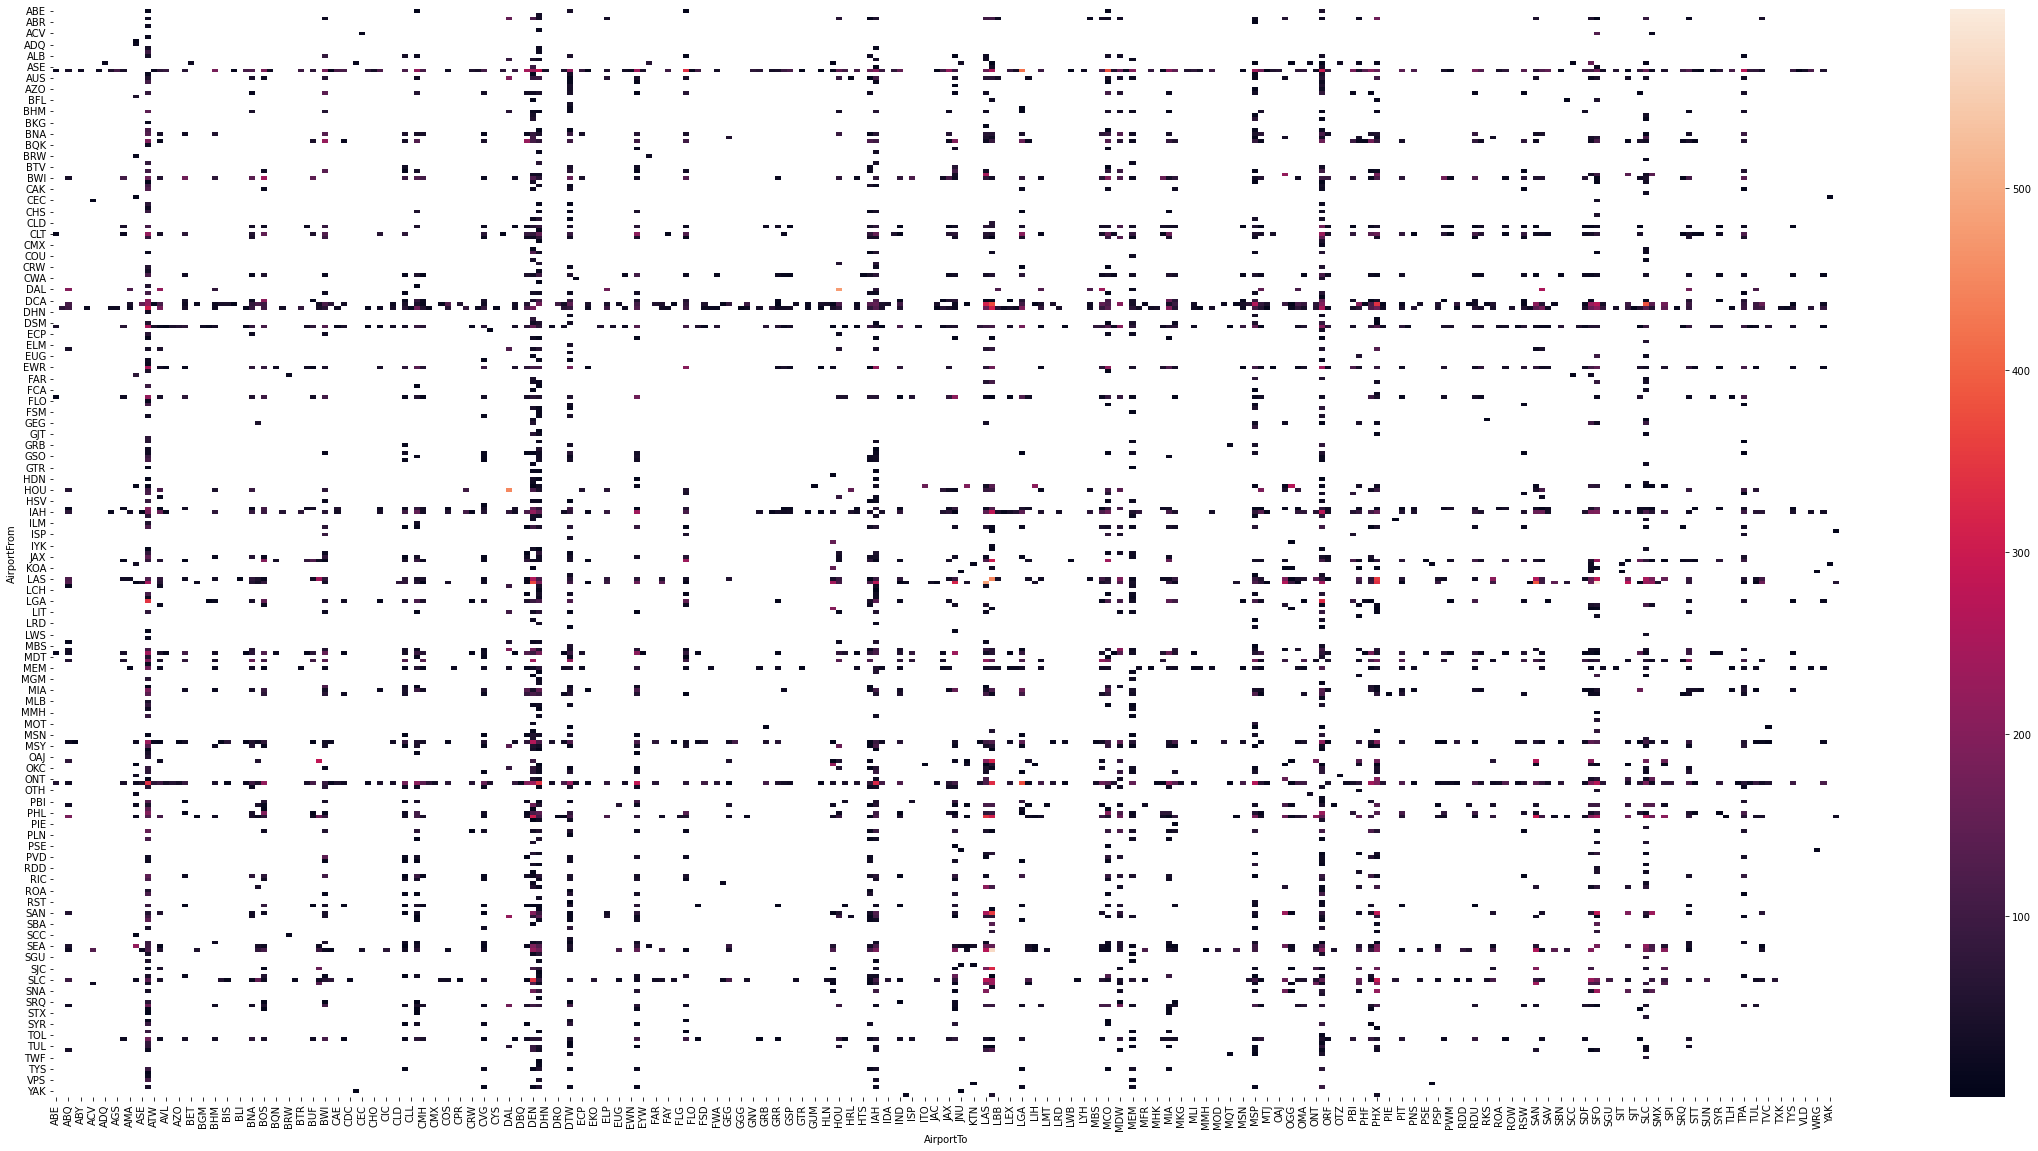

In [12]:
plt.figure(figsize = (40,20))
sns.heatmap(df_test)
plt.show()